# Louvain

This package adds the capability of community detection using the Louvain method. The name of the package is community, but it refers to Python-Louvain on PyPI.

The Louvain Community Detection Algorithm is a straightforward method for determining a network's community structure. It is a heuristic method for optimizing modularity.

To install the package, please run the below command in a Jupyter notebook and once the command runs successfully, restart the kernel:

In [1]:
# pip install networkx

**To solve the error ModuleNotFoundError: No module named 'community when running "import community as community_louvain"**
Source: [How to use the communities module "python-louvain"](https://stackoverflow.com/questions/53087066/how-to-use-the-communities-module-python-louvain-in-networkx-2-2)

Alternative 1: Reinstall packages in the following order.
 - pip install python-louvain
 - pip uninstall community
 - pip install python-louvain
 - pip install networkx


Alternative 2: Change the way to import the library.
 - Use instead: import community.community_louvain as community_louvain
 
 
Alternative 3: Reload the library.
 - from importlib import reload
 - reload(community)
 

To import the package, run the following command in a Jupyter notebook:

In [2]:
import community as community_louvain

#### 1. community_louvain.best_partition()

In [3]:
# community_louvain.best_partition(graph, 
#                                  partition=None, 
#                                  weight='weight,' 
#                                  resolution=1.0, 
#                                  randomize=None, 
#                                  random state=None)

The parameters used by the function are as shown below:

- graph: networkx.Graph. The NetworkX graph that has been decomposed into
- partition: dict, optional. The algorithm will begin to use this node partition. It's a dictionary in which the keys are nodes and the values are communities.
- weight: str, optional the key in the graph to be used as a weight. Default to ‘weight’.
- Resolution: double, optional. The default value of 1 represents the time described in "Laplacian Dynamics and Multiscale Modular Structure in Networks." M. Barahona, R. Lambiotte, J.-C. Delvenne
- Randomize: boolean, optional. Will generate different partitions at each call by randomizing the node evaluation order and the community evaluation order.
- random_state: int, RandomState instance or None, optional (default=None). If a random state is an int, it is the seed used by the random number generator; if a random state is an instance of RandomState, it is the random number generator. If None, the RandomState instance used by np. random is used as the random number generator.

# Tutorial

- [community API](https://python-louvain.readthedocs.io/en/latest/api.html)

Nodes:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Node attributes:
{0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}
Club attrubute of node 1:
Mr. Hi
Club attribute of all nodes:
['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 

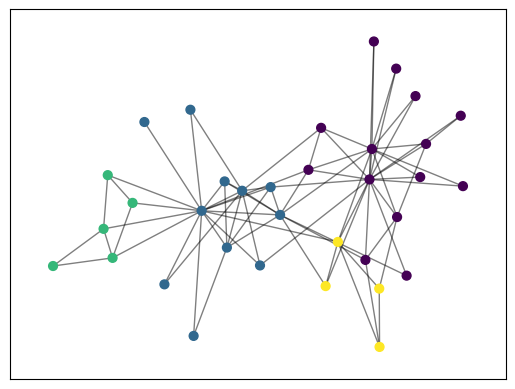

In [4]:
# display a graph with its communities:
# as Erdos-Renyi graphs don't have true community structure,
# instead load the karate club graph
import community as community_louvain
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# karate_club_graph --> Return Zachary’s Karate Club graph.
# Each node in the returned graph has a node attribute 'club' that indicates the name of the 
# club to which the member represented by that node belongs
G = nx.karate_club_graph()
print('Nodes:', G.nodes, sep='\n')
print('Node attributes:', nx.get_node_attributes(G, "club"), sep='\n')
print('Club attrubute of node 1:', G.nodes[1]["club"], sep='\n')
print('Club attribute of all nodes:', [G.nodes[n]['club'] for n in G.nodes], sep='\n')

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = matplotlib.colormaps['viridis'] #cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [5]:
# Find communities in the graph and return the associated dendrogram
from community import generate_dendrogram, partition_at_level
from pprint import pprint

G=nx.erdos_renyi_graph(100, 0.01)
dendo = generate_dendrogram(G)
for level in range(len(dendo) - 1) :
    print("partition at level", level, "is:")
    print(partition_at_level(dendo, level))

partition at level 0 is:
{0: 57, 1: 1, 2: 22, 3: 3, 4: 61, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 47, 15: 15, 16: 18, 17: 17, 18: 18, 19: 19, 20: 33, 21: 21, 22: 22, 23: 5, 24: 24, 25: 3, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 57, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 62, 40: 31, 41: 41, 42: 22, 43: 43, 44: 44, 45: 49, 46: 46, 47: 47, 48: 48, 49: 49, 50: 14, 51: 45, 52: 52, 53: 2, 54: 54, 55: 55, 56: 56, 57: 57, 58: 15, 59: 59, 60: 62, 61: 61, 62: 62, 63: 63, 64: 64, 65: 31, 66: 0, 67: 2, 68: 55, 69: 14, 70: 4, 71: 14, 72: 16, 73: 39, 74: 20, 75: 33, 76: 23, 77: 23, 78: 25, 79: 16, 80: 58, 81: 32, 82: 39, 83: 55, 84: 1, 85: 64, 86: 13, 87: 40, 88: 42, 89: 45, 90: 50, 91: 60, 92: 51, 93: 45, 94: 13, 95: 53, 96: 57, 97: 62, 98: 58, 99: 60}


## Another example

**erdos_renyi_graph**
> Belongs to **Random Graphs Generators** for random graphs.
> $ erdos_renyi_graph(n, p, seed=None, directed=False) $<br>
> Returns a $ G_{n, p} $ random graph, also known as an Erdős-Rényi graph or a binomial graph.<br>
> The $ G_{n, p} $ model chooses each of the possible edges with probability $ p $.

**More about different generators**
> [NetworkX Graph generators](https://networkx.org/documentation/stable/reference/generators.html)

In [6]:
# basic usage
import community as community_louvain
import networkx as nx

G = nx.erdos_renyi_graph(100, 0.01)
print('Number of nodes:', len(G.nodes))

partion = community_louvain.best_partition(G)
print('Total partitions: ', len(set(partion.values())))

Number of nodes: 100
Total partitions:  50


------------------